<a href="https://colab.research.google.com/github/alejitalaanalitica/Inteligencia-Artificial/blob/main/Modelo_No_supervisado_Agrupaci%C3%B3n_de_Estaciones_en_TransMilenio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agrupación de Estaciones en TransMilenio - Modelo No Supervisado**

Este trabajo de exploración aborda la clasificación de estaciones en la red de TransMilenio mediante el algoritmo K-Means. Presentado como parte de la entrega para el curso de Inteligencia Artificial del profesor Julian Lopez, específicamente en la Actividad 4. Utilizando datos sintéticos, el programa transforma variables y estandariza datos antes de aplicar K-Means. La visualización resultante en un gráfico proporciona una perspectiva inicial de la agrupación de estaciones basada en sus características.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


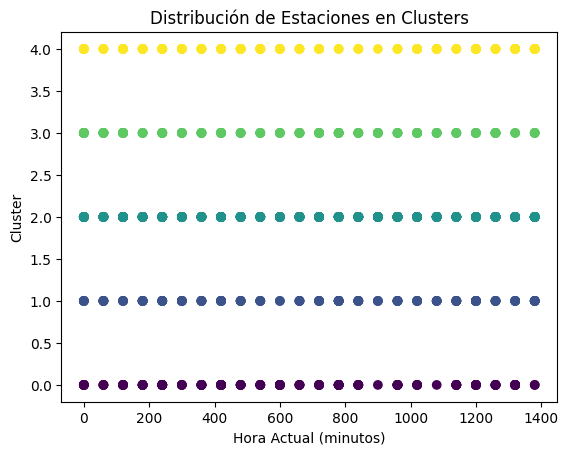

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import random

# Crear una lista de días de la semana
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Crear una lista de estaciones
estaciones = ['Portal Norte', 'Toberin', 'Mazuren', 'Calle 146', 'Alcala', 'Pepe Sierra', 'Calle 100', 'Virrey', 'Calle 85', 'Cra. 47', 'Cra. 53', 'Granja - Cra. 77', 'Av. Cali', 'Cra. 90', 'Portal 80']

# Crear un conjunto de datos de muestra similar al anterior
data = {'Hora_Actual': [], 'Dia_Semana': [], 'Estacion_Inicio': [], 'Estacion_Destino': []}

for _ in range(1000):
    hora_actual = random.choice(range(24))
    dia_semana = random.choice(dias_semana)
    estacion_inicio = random.choice(estaciones)
    estacion_destino = random.choice(estaciones)

    data['Hora_Actual'].append(hora_actual)
    data['Dia_Semana'].append(dia_semana)
    data['Estacion_Inicio'].append(estacion_inicio)
    data['Estacion_Destino'].append(estacion_destino)

df = pd.DataFrame(data)

# Convertir la columna 'Hora_Actual' a tipo numérico (hora en minutos)
df['Hora_Actual'] = df['Hora_Actual'] * 60

# Convertir las variables categóricas a variables dummy
df = pd.get_dummies(df, columns=['Dia_Semana', 'Estacion_Inicio', 'Estacion_Destino'], drop_first=True)

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Aplicar el algoritmo de k-means
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

import matplotlib.pyplot as plt

# Graficar la distribución de las estaciones en los clusters
plt.scatter(df['Hora_Actual'], df['Cluster'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Hora Actual (minutos)')
plt.ylabel('Cluster')
plt.title('Distribución de Estaciones en Clusters')
plt.show()